<a href="https://colab.research.google.com/github/matheuscosantos/candidatos-cassados-eleicoes-2016/blob/main/Analise_eleicoes_2016.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de sobre candidatos cassados nas eleições municipais de 2016

# Introdução

Esse trabalho tem como intuíto verificar os dados de políticos cassados nas eleições municípais de 2016.

Autor: Matheus da Cruz Oliveira dos Santos

Fonte dos dados: https://brasil.io/home/

## Importação das bibliotecas utilizadas

In [142]:
import pandas as pd

## Adição dos dados para análise


In [143]:
cassado_com_recurso = pd.read_csv("/content/drive/My Drive/Dados/eleicoes-brasil-cassado-com-recurso.csv")
cassado = pd.read_csv("/content/drive/My Drive/Dados/eleicoes-brasil-cassados.csv")
frames = [cassado_com_recurso, cassado]
dados = pd.concat(frames)

## Candidatos cassados ou cassados com recurso

In [144]:
quantidade = dados['des_situacao_candidatura'].to_frame() \
                                              .reset_index() \
                                              .groupby(by='des_situacao_candidatura') \
                                              .count()
quantidade = quantidade.reset_index()
quantidade.columns = ['situacao', 'quantidade']
quantidade

,situacao,quantidade
0,CASSADO,102
1,CASSADO COM RECURSO,35


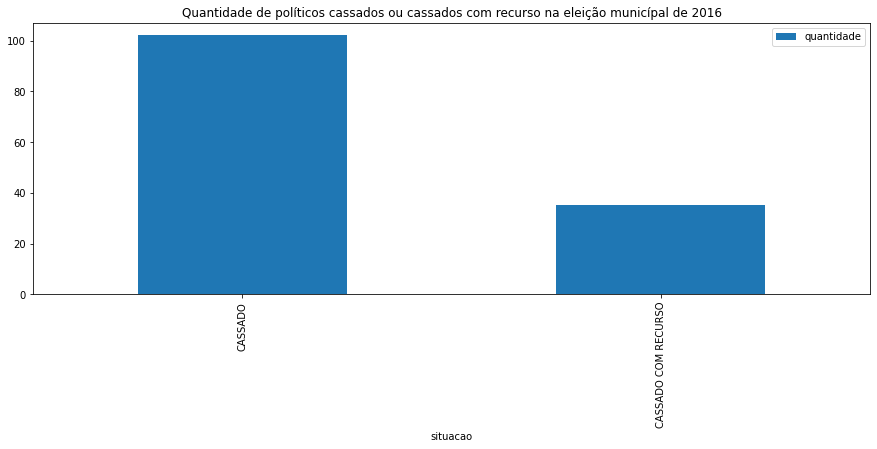

In [158]:
quantidade.plot.bar(x='situacao', y='quantidade', title='Quantidade de políticos cassados ou cassados com recurso nas eleições municípais de 2016', rot=90, figsize=(15,5))

## Candidatos cassados ou cassados com recurso por estado.
### Obs.: A quantidade de políticos cassados no estado do Piauí é elevado.

In [146]:
quantidade_por_estado = dados['sigla_uf'].to_frame() \
                                         .reset_index() \
                                         .groupby(by='sigla_uf') \
                                         .count() \
                                         .sort_values(['index'], ascending=False) \

quantidade_por_estado = quantidade_por_estado.reset_index()
quantidade_por_estado.columns = ['estado', 'quantidade']
quantidade_por_estado

,estado,quantidade
0,SP,50
1,PI,45
2,SC,11
3,RS,5
4,GO,4
5,MG,4
6,RJ,4
7,CE,3
8,MA,2
9,PR,2


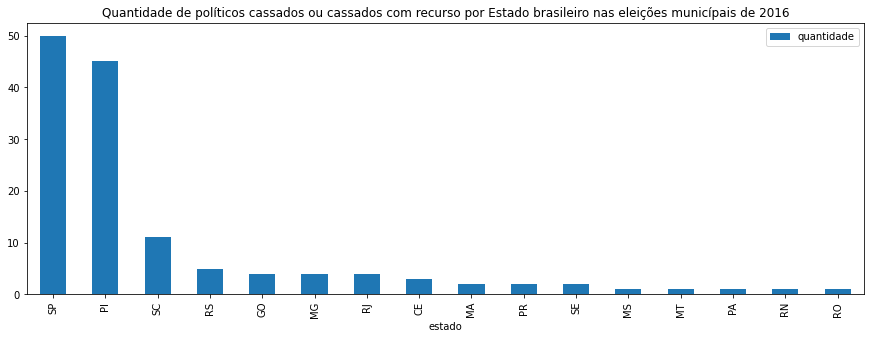

In [159]:
quantidade_por_estado.plot.bar(x='estado', y='quantidade', title='Quantidade de políticos cassados ou cassados com recurso por Estado brasileiro nas eleições municípais de 2016', rot=90, figsize=(15,5))

## Candidatos cassados ou cassados com recurso por partido

In [148]:
quantidade_por_partido = dados['sigla_partido'].to_frame() \
                                               .reset_index() \
                                               .groupby(by='sigla_partido') \
                                               .count() \
                                               .sort_values(['index'], ascending=False) \
                                               

quantidade_por_partido = quantidade_por_partido.reset_index()
quantidade_por_partido.columns = ['partido', 'quantidade']
quantidade_por_partido

,partido,quantidade
0,PTB,19
1,PR,11
2,PMDB,10
3,PSDB,10
4,PSD,10
5,PSB,9
6,PPS,9
7,PTC,8
8,PP,7
9,DEM,6


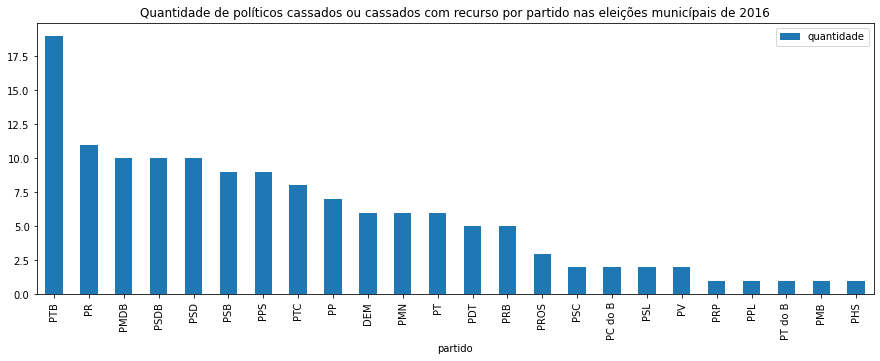

In [160]:
quantidade_por_partido.plot.bar(x='partido', y='quantidade', title='Quantidade de políticos cassados ou cassados com recurso por partido nas eleições municípais de 2016', rot=90, figsize=(15,5))

## Candidatos cassados ou cassados com recurso e eleitos

In [150]:
descricao = dados['desc_sit_tot_turno'].to_frame() \
                                       .reset_index() \
                                       .groupby(by='desc_sit_tot_turno') \
                                       .count() \
                                       .sort_values(['index'], ascending=False)

descricao = descricao.reset_index()
descricao.columns = ['descrição', 'quantidade']
descricao

,descrição,quantidade
0,NÃO ELEITO,108
1,ELEITO,16
2,ELEITO POR QP,7
3,SUPLENTE,3


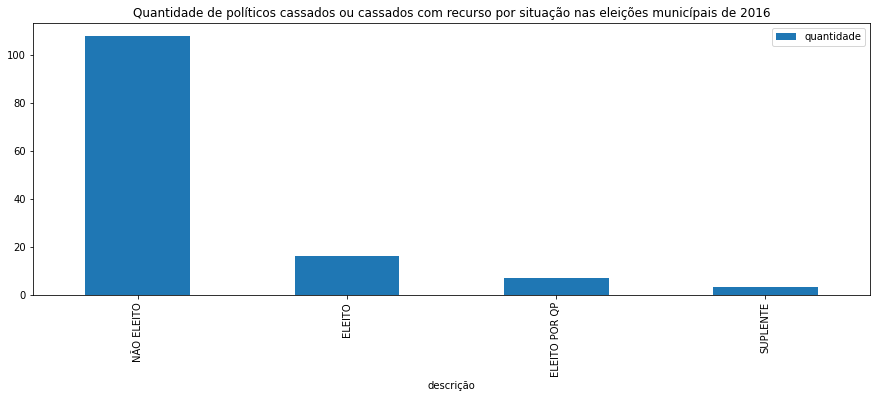

In [161]:
descricao.plot.bar(x='descrição', y='quantidade', title='Quantidade de políticos cassados ou cassados com recurso por situação nas eleições municípais de 2016', rot=90, figsize=(15,5))

## Candidatos cassados ou cassados agrupados por sexo

In [152]:
orientacao = dados['descricao_sexo'].to_frame() \
                                    .reset_index() \
                                    .groupby(by='descricao_sexo') \
                                    .count() \
                                    .sort_values(['index'], ascending=False)

orientacao = orientacao.reset_index()
orientacao.columns = ['orientação sexual', 'quantidade']
orientacao

,orientação sexual,quantidade
0,MASCULINO,102
1,FEMININO,35


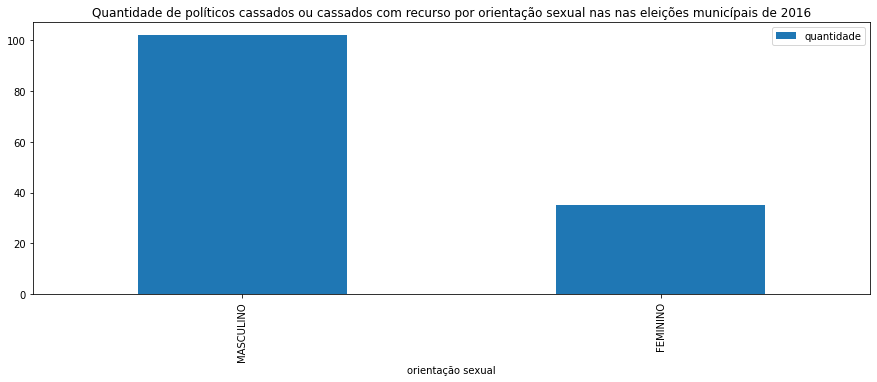

In [162]:
orientacao.plot.bar(x='orientação sexual', y='quantidade', title='Quantidade de políticos cassados ou cassados com recurso por orientação sexual nas nas eleições municípais de 2016', rot=90, figsize=(15,5))

## Candidatos cassados e que foram eleitos. 
### Obs.: A maioria das cidades dessa lista possuem prefeitos e vice-prefeitos cassados e estão no Estado de São Paulo

In [154]:
eleitos = dados.query('desc_sit_tot_turno == "ELEITO"') \
               .sort_values(['descricao_ue'], ascending=False)

eleitos = eleitos.drop(columns=['cpf_candidato','num_turno','numero_candidato','data_nascimento','descricao_sexo'])
eleitos.columns = ['ano', 'uf', 'municipio', 'cargo', 'partido', 'nome', 'nome na urna', 'situação', 'descrição']
eleitos

,ano,uf,municipio,cargo,partido,nome,nome na urna,situação,descrição
100,2016,SP,TURMALINA,PREFEITO,PTB,FERNANDA DE MENEZES ANDRÉA,FERNANDA,CASSADO,ELEITO
101,2016,SP,TURMALINA,VICE-PREFEITO,PTB,ALCIR ANTONIO DE AQUINO,ALCIR,CASSADO,ELEITO
33,2016,SP,SANTA CRUZ DAS PALMEIRAS,PREFEITO,PTB,THIAGO DE OLIVEIRA,THIAGO DO TRABALHADOR,CASSADO COM RECURSO,ELEITO
34,2016,SP,SANTA CRUZ DAS PALMEIRAS,VICE-PREFEITO,PTB,JOSIAS RABELO JUNIOR,DR. JOSIAS,CASSADO COM RECURSO,ELEITO
29,2016,SP,NOVA ODESSA,PREFEITO,PSDB,BENJAMIM BILL VIEIRA DE SOUZA,BILL,CASSADO COM RECURSO,ELEITO
30,2016,SP,NOVA ODESSA,VICE-PREFEITO,PPS,OSCAR BERGGREN NETO,OSCAR BERGGREN,CASSADO COM RECURSO,ELEITO
27,2016,SP,MONTE AZUL PAULISTA,PREFEITO,PSDB,PAULO SERGIO DAVID,PAULO DAVID,CASSADO COM RECURSO,ELEITO
28,2016,SP,MONTE AZUL PAULISTA,VICE-PREFEITO,DEM,FABIO JERONIMO MARQUES,FABINHO,CASSADO COM RECURSO,ELEITO
20,2016,SP,ITAPURA,PREFEITO,PP,FABIO DOURADO,FABIO DOURADO,CASSADO COM RECURSO,ELEITO
22,2016,SP,ITAPURA,VICE-PREFEITO,PRB,RODRIGO DE OLIVEIRA PRADO,RODRIGO PRADO,CASSADO COM RECURSO,ELEITO


## Municípios com prefeito e vice-prefeito cassados e eleitos

In [155]:
eleitos_aux = eleitos.drop(columns=['cargo','partido','nome','nome na urna','situação'])
municipios_com_vice_e_prefeito = eleitos_aux[eleitos_aux.duplicated()]
municipios_com_vice_e_prefeito

,ano,uf,municipio,descrição
101,2016,SP,TURMALINA,ELEITO
34,2016,SP,SANTA CRUZ DAS PALMEIRAS,ELEITO
30,2016,SP,NOVA ODESSA,ELEITO
28,2016,SP,MONTE AZUL PAULISTA,ELEITO
22,2016,SP,ITAPURA,ELEITO
17,2016,SP,FLOREAL,ELEITO
94,2016,SP,CAJAMAR,ELEITO
